##### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

###### importing dataset


In [2]:
train_data = pd.read_csv('C:/Users/User/Desktop/internship/archive/Genre Classification Dataset/train_data.txt',  delimiter = ":::", header=None, names=["id" ,'Title','Gener','Discreption'], engine='python' )
train_data.head()

,id,Title,Gener,Discreption
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Gener        54214 non-null  object
 3   Discreption  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
train_data.isnull().sum()

id             0
Title          0
Gener          0
Discreption    0
dtype: int64

<AxesSubplot:>

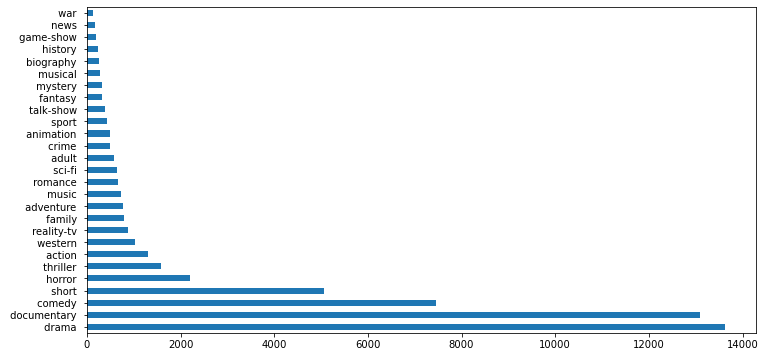

In [5]:
plt.figure(figsize=(12,6))
train_data['Gener'].value_counts().plot.barh()

In [6]:
test_data_solution = pd.read_csv('C:/Users/User/Desktop/internship/archive/Genre Classification Dataset/test_data_solution.txt',  delimiter = ":::", header=None, names=["id" ,'Title','Gener','Discreption'], engine='python' )
test_data_solution.head()

,id,Title,Gener,Discreption
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [7]:
test_data_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Gener        54200 non-null  object
 3   Discreption  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
test_data_solution.isnull().sum()

id             0
Title          0
Gener          0
Discreption    0
dtype: int64

<AxesSubplot:>

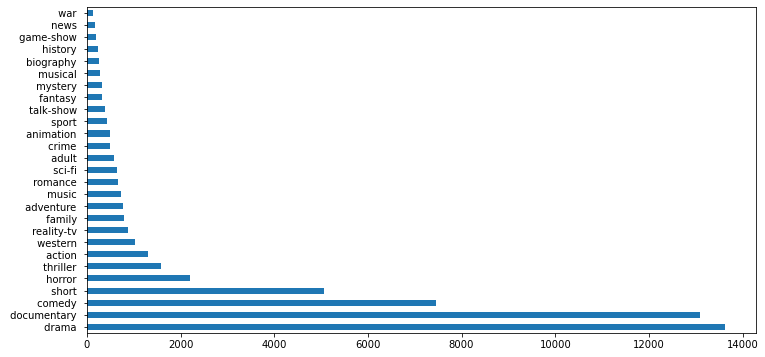

In [9]:
plt.figure(figsize=(12,6))
test_data_solution['Gener'].value_counts().plot.barh()

#### concating train_data and test_data_solution

In [10]:
data = pd.concat([train_data, test_data_solution], axis=0)
data

,id,Title,Gener,Discreption
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


##### Cleaning data

In [11]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates

data.drop_duplicates(inplace = True)  ## Will drops any duplicates

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108414 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           108414 non-null  int64 
 1   Title        108414 non-null  object
 2   Gener        108414 non-null  object
 3   Discreption  108414 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.1+ MB


In [13]:
data.isnull().sum()

id             0
Title          0
Gener          0
Discreption    0
dtype: int64

##### Visualizing data

<AxesSubplot:>

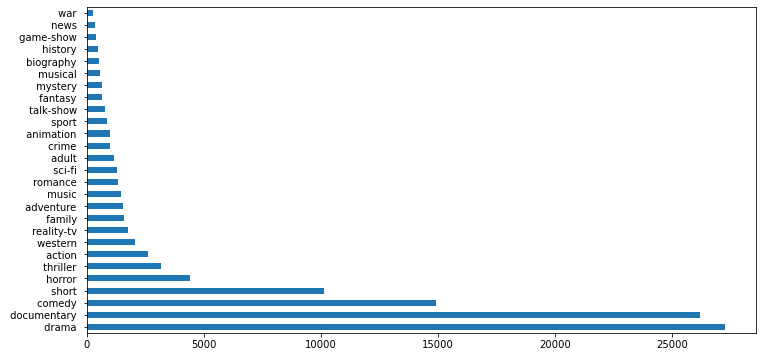

In [14]:
plt.figure(figsize=(12,6))
data['Gener'].value_counts().plot.barh()

#### label encoding

In [15]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'Gener' column
train_data['Gener_encoded'] = label_encoder.fit_transform(train_data['Gener'])
train_data.head()

,id,Title,Gener,Discreption,Gener_encoded
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [16]:
column_drop=['id','Title']
data.drop(columns=column_drop, inplace=True)
data.head()

,Gener,Discreption
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...


In [17]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'Gener' column
data['Gener_encoded'] = label_encoder.fit_transform(data['Gener'])
data.head()

,Gener,Discreption,Gener_encoded
0,drama,Listening in to a conversation between his do...,8
1,thriller,A brother and sister with a past incestuous r...,24
2,adult,As the bus empties the students for their fie...,1
3,drama,To help their unemployed father make ends mee...,8
4,drama,The film's title refers not only to the un-re...,8


###### Visualizing data

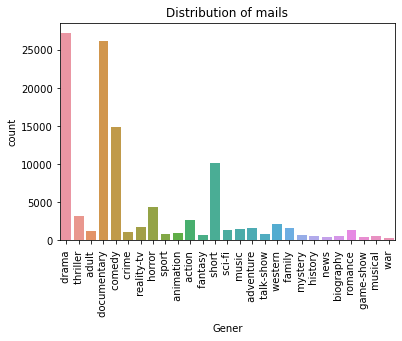

In [18]:
sns.countplot(data=data, x='Gener')
plt.xlabel('Gener')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.xticks(rotation=90)
plt.show()

In [19]:
Y = data['Gener_encoded']
Y.head()

0     8
1    24
2     1
3     8
4     8
Name: Gener_encoded, dtype: int32

In [20]:
X = data['Discreption']
X.head()

0     Listening in to a conversation between his do...
1     A brother and sister with a past incestuous r...
2     As the bus empties the students for their fie...
3     To help their unemployed father make ends mee...
4     The film's title refers not only to the un-re...
Name: Discreption, dtype: object

##### Splitting the data into train and test data

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [22]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(108414,)
(75889,)
(32525,)


##### Convert the training and testing text messages into numerical features using TF-IDF


In [23]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)


X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [24]:
print(X_train_features)

  (0, 85669)	0.2526870456002271
  (0, 87108)	0.14472899896664557
  (0, 11676)	0.29828931576848094
  (0, 100824)	0.15250562210630042
  (0, 129232)	0.18762443538351478
  (0, 55529)	0.17652860231101108
  (0, 123935)	0.26569860967024816
  (0, 88177)	0.15820167595609896
  (0, 133766)	0.3003233640544482
  (0, 115148)	0.12318625979710483
  (0, 122820)	0.09149541855717665
  (0, 36072)	0.2044699424167434
  (0, 92154)	0.3243435870035994
  (0, 42802)	0.13909610717969054
  (0, 94916)	0.2105389744788389
  (0, 19234)	0.17628141037989867
  (0, 34593)	0.2754737035084838
  (0, 107093)	0.20730364304525617
  (0, 75516)	0.11773324773487816
  (0, 96590)	0.09962202485531815
  (0, 42080)	0.1477992928812571
  (0, 9859)	0.15486948920034518
  (0, 24693)	0.22817627874591162
  (0, 44916)	0.1566893011391391
  (0, 116778)	0.1427987952874853
  :	:
  (75887, 58594)	0.05446972584308495
  (75887, 36438)	0.0550378490013516
  (75887, 96590)	0.10165193109058385
  (75888, 141352)	0.23411396650232597
  (75888, 125240)	0.244

In [25]:
print(Y_train)

16385    21
22043     7
35844     8
51934    13
15812     5
         ..
44566     7
41602     8
17959     5
46665     7
35042    26
Name: Gener_encoded, Length: 75889, dtype: int32


In [26]:
test_data = pd.read_csv('C:/Users/User/Desktop/internship/archive/Genre Classification Dataset/test_data.txt',  delimiter = ":::", header=None, names=["id" ,'Title','Discreption'], engine='python') 
test_data.head()

,id,Title,Discreption
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [27]:
X_test1 = test_data['Discreption']
X_test1.head()

0     L.R. Brane loves his life - his car, his apar...
1     Spain, March 1964: Quico is a very naughty ch...
2     One year in the life of Albin and his family ...
3     His father has died, he hasn't spoken with hi...
4     Before he was known internationally as a mart...
Name: Discreption, dtype: object

In [28]:
print(X_test1.shape)

(54200,)


In [29]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# Convert the training and testing text messages into numerical features using TF-IDF
X_test_features1 = feature_extraction.fit_transform(X_test1)


##### Naive Bayes classifier

In [30]:
model = MultinomialNB()
model.fit(X_train_features,Y_train)

MultinomialNB()

In [31]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 47.294074240008435 %
Accuracy on test data: 44.22751729438893 %


##### Logistic Regression 

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_features,Y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 72.12507741569925 %
Accuracy on test data: 60.15065334358186 %
